<a href="https://colab.research.google.com/github/penelopetir/24SBIOL74.03PT/blob/main/Exercise_2_Electric_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOL 74.03 (SP23): Computational Modeling of the Nervous System
## Exercise 2: Calculating and visualizing electric fields and currents in Python

### Exercise goals

1) Gain intuition for electric field and voltage in the context of point charges

2) Learn how to use NumPy to do basic calculations on vectors and arrays

3) Learn how to use matplotlib/plotly to visualize 1, 2, and 3D functions

Work through the code below, running each cell, adding code where required, and making sure you understand the output. When you see questions with <font color='red'>***Q:***</font> preceding them, write your responses in text cells.


# Visualizing the electric field for a point charge

In this exercise, we'll be calculating and visualizing the fields generated by charges. To do this, we'll use two handy python libraries or "packages", NumPy (`numpy`) and `matplotlib`.

Start by importing these packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

You'll notice for matplotlib, we just imported a subset of the full package containing the plotting functions.

Now to use any function within the numpy library, we can use the `np` namespace, and to use plotting functions within `matplotlib.pyplot`, we can use `plt`, which you'll see in a moment.

If you've never used NumPy, start out by reading through the first three sections of the Introduction to Numpy from the Python Data Science Handbook [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html). I would recommend clicking the "Open in Colab" button and modifying code in the code section to make sure you understand what's being done. Another good introduction for beginners can be found at the Numpy website, [here](https://numpy.org/doc/stable/user/absolute_beginners.html).

Before moving on, you should be familiar with what numpy arrays are, how to define and inspect the size/shape of 1 and 2D arrays, and the basics of indexing arrays.

Similarly, if you've never used matplotlib, check out the sections on matplotlib [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)



Let's start by visualizing the electric field generated by a point charge. Below is some code plotting the location of this point charge, which we'll refer to as our "source" charge, and an example location for a test charge, with some annotations to help us get started. Feel free to change the location of the source or test charge and replot (note, the annotations may not look as pretty depending on where you move it).

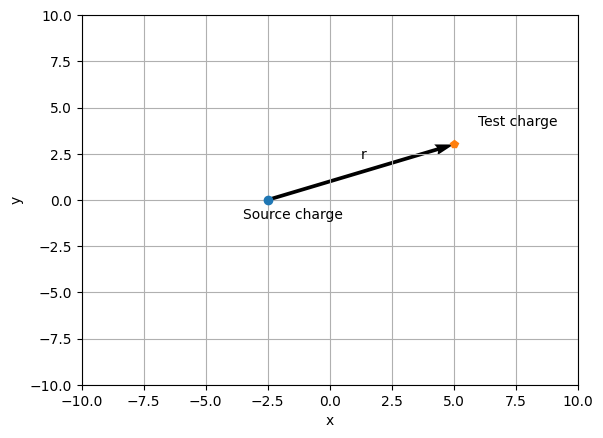

In [ ]:
x0 = -2.5 # x coordinate of source charge (meters, m)
y0 = 0 # y coordinate of source charge (m)
x_test = 5 # x coordinate of test charge (m)
y_test = 3 # y coordinate of test charge (m)
r_x = x_test - x0 # x component of displacement vector to test charge
r_y = y_test - y0 # y component of displacement vector to test charge

#creation of the plot
fig = plt.figure()
ax = plt.axes()
ax.plot(x0,y0,marker='o'); # plot source charge
ax.text(x0-1,y0-1,'Source charge')
ax.plot(x_test,y_test,marker='p'); # plot example test charge
ax.text(x_test+1,y_test+1,'Test charge')
ax.quiver(x0,y0,r_x,r_y,color='k',
          angles='xy',scale_units='xy',scale=1) # plot a vector from the source to test charge, represent actual distance
ax.text(x0 + 0.5*r_x,y0 + 0.75*r_y,'r')
ax.set_xlim([-10,10]); ax.set_ylim([-10,10]);
ax.set_xlabel('x'); ax.set_ylabel('y');
ax.grid()

Our goal is to calculate and visualize the electric field that would be experienced by a test charge anywhere in space.

The equation for the electric field generated by a point charge is given by $\vec{E} = \frac{kQ}{r^{2}}\hat{r}$.

Recall, $k$ is the universal Coulomb constant ($k = 8.99 \times 10^9 \frac{Nm^{2}}{C^{2}}$), $Q$ is the magnitude of our source charge, $r$ is the distance from the test charge to the source charge, and $\hat{r}$ is the unit vector from the source charge to test charge.

$\hat{r}$ will depend on the location of the source and test charge, and is given by:

$\hat{r} = \frac{\vec{r}}{r}$, where

$\vec{r} = (x - x_{0}) \hat{x} + (y - y_{0}) \hat{y}$

$r = \sqrt{(x-x_{0})^2 + (y - y_{0})^2}$.

Putting this together, $\vec{E}$ is given by,

$\vec{E} = \frac{kQ}{r^{2}} \frac{\vec{r}}{r} = \frac{kQ}{r^{3}}\vec{r}=\frac{kQ}{r^{3}}[ (x - x_{0})\hat{x} + (y - y_{0}) \hat{y}]$


We can separate this vector field into its two components (in 2D), $E_{x}$ and $E_{y}$:

$E_{x} = \frac{kQ}{r^{3}}(x - x_{0})\hat{x}$

$E_{y} = \frac{kQ}{r^{3}}(y - y_{0})\hat{y}$

Now, let's try calculating these components over a grid of test charge positions with numpy arrays. We'll start by creating a 2D grid of points using `np.linspace` and `np.meshgrid`.


In [ ]:
N = 21 # number of grid points in x and y direction
x = np.linspace(-10,10,N) # x coordinates (m)
y = np.linspace(-10,10,N) # y coordinates (m)
X, Y = np.meshgrid(x,y) # make 2D grid of x coordinates and y coordinates

Take a moment to inspect these grids to get some intuition for how they're defined. What happens when you change the row index for the `X` array (e.g., `X[0,0]` vs. `X[1,0]` or column index for the `Y` array (e.g., `Y[0,0]` vs. `Y[0,1]`)?

In [ ]:
#looking at meshgrid function
#help(np.meshgrid)

# Test out indexing X
print(f"X[0,0]: {X[0,0]}")
print(f"X[1,0]: {X[1,0]}")
print(f"X[2,0]: {X[1,0]}")
print(f"X[3,0]: {X[1,0]}") #changing the row index doesn't change the X value
print(f"X[0,1]: {X[0,1]}") #but changing the column index does

print("\n")
# Test out indexing Y
print(f"Y[0,0]: {Y[0,0]}")
print(f"Y[0,1]: {Y[0,1]}")
print(f"Y[0,2]: {Y[0,2]}")
print(f"Y[0,3]: {Y[0,3]}") #changing the column index doesn't change the Y value
print(f"Y[1,0]: {Y[1,0]}") #but changing the row index does

#the meshgrid gives us the values of X and Y at those coordinates in space
print("\nShapes of arrays")
print(f"shape of X: {np.shape(X)}")
print(f"shape of Y: {np.shape(Y)}")

X[0,0]: -10.0
X[1,0]: -10.0
X[2,0]: -10.0
X[3,0]: -10.0
X[0,1]: -9.0


Y[0,0]: -10.0
Y[0,1]: -10.0
Y[0,2]: -10.0
Y[0,3]: -10.0
Y[1,0]: -9.0

Shapes of arrays
shape of X: (21, 21)
shape of Y: (21, 21)


Now, let's calculate $E_{x}$ and $E_{y}$ at these grid points for a unit source charge

In [ ]:
k = 8.99e9 # Coulomb's constant (N m^2 / C^2)
Q = 1 # source charge (C)
r = np.sqrt((X - x0)**2 + (Y-y0)**2) # distance from each position to source charge
Ex = k*Q*(X - x0)/r**3
Ey = k*Q*(Y - y0)/r**3


<font color='red'>**Q1**: What dimensions (number of rows and columns) do you expect `r` to be? What are the units of $E_{x}$ and $E_{y}$?
</font>

I would expect the dimensions of r to be 21 x 21; for each of the source charges, we are calculating the distances to each point on our grid. x0 and y0 are just the points of our grid (constants)

The units of x and y are in meters, thus r will be in meters. The units of k are in N*m^2/C^2, Q in C, so the units of E should be in N/C. In class we say that it is V/m, which is actually the same if you decompose to simpler units.

In [ ]:
#chcekcing the dimensions
print(f"The shape of r is {r.shape}")

The shape of r is (21, 21)


Now let's plot using `np.quiver`

(-11.0, 11.0, -11.0, 11.0)

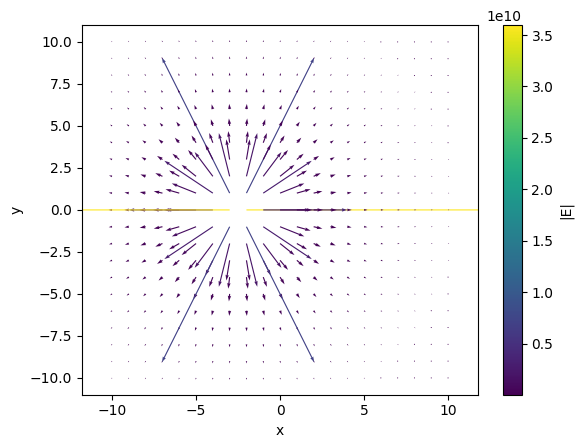

In [ ]:
Emag = np.hypot(Ex,Ey) # magnitude of E-field at each location

fig = plt.figure()
ax = plt.axes()
q = ax.quiver(X,Y,Ex,Ey,Emag)
ax.set_xlabel('x'); ax.set_ylabel('y');
cbar = plt.colorbar(q)
cbar.ax.set_ylabel('|E|')
ax.axis('equal') # make x and y axis scaling equal

<font color='red'>***Q2***: Describe what the plot is showing. What's going on at `(0,0)`? </font>





The plot shows the electric field around the point charge as a result of it. Based on the size of the arrows (the magnitude), we can see that the electric field is strongest right near the point charge, and decreases as we move away from it. This makes sense, as the test charge being farther away means that the distance between the point charge and test charge increases and thus the force experienced on the test charge (indicative of the electric field) decreases.

The point charge is at 0,0, so there is no apparent electric field right at 0,0. if the charges are on top of each other there is no difference in radius which means that there can be no forces acting upon the points (it is indeterminate, with a denominator of zero in Coulomb's law)

Now, if we want to move the source charge and replot, rather than rewriting all the code above, define a function to calculate the E-field given the charge location, magnitude, and test charge coordinates (`calcEfield`) and a function to plot the vector field (`plotEfieldVecs`) given. To make things easier to interpret, plot the vectors with unit length and set their color to be the magnitude normalized to the global max.

In [ ]:
#x0 and y0 are the coordinates of the point charge, Q its charge
#X and Y make up the meshgrid of test charge points
def calcEfield(x0,y0,Q,X,Y): # add inputs here

  #calculates the electric field in the grid
  k = 8.99e9 # Coulomb's constant (N m^2 / C^2)
  r = np.sqrt((X - x0)**2 + (Y-y0)**2) # distance from each position to source charge
  Ex = k*Q*(X - x0)/r**3
  Ey = k*Q*(Y - y0)/r**3
  return Ex,Ey

def plotEfieldVecs(Ex,Ey,X,Y,title_string = ""): # add inputs here
  Emag = np.hypot(Ex,Ey) # magnitude of E-field at each location
  fig = plt.figure()
  ax = plt.axes()
  plt.title(title_string)
  q = ax.quiver(X,Y,Ex,Ey,Emag)
  ax.set_xlabel('x'); ax.set_ylabel('y');
  cbar = plt.colorbar(q)
  cbar.ax.set_ylabel('|E|')
  ax.axis('equal') # make x and y axis scaling equal
  return fig, ax

Now, use your functions to plot the E-field for a source charge located at `(1.3,2.4)`. Generate plots for both a positive and negative source charge.

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Negative Charge at (1.3,2.4)'}, xlabel='x', ylabel='y'>)

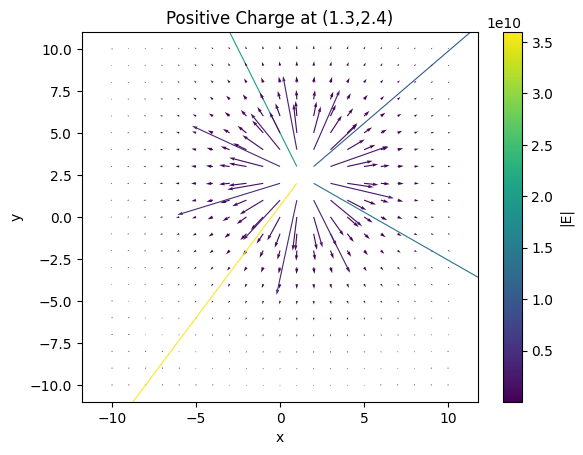

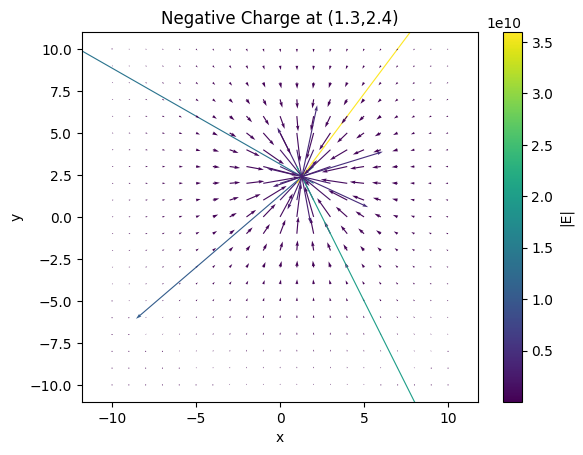

In [ ]:
N = 21 # number of grid points in x and y direction
x = np.linspace(-10,10,N) # x coordinates (m)
y = np.linspace(-10,10,N) # y coordinates (m)
x0 = 1.3
y0 = 2.4
Q = [1,-1]

Ex_test, Ey_test = calcEfield(x0,y0,Q[0],X,Y)
plotEfieldVecs(Ex_test, Ey_test, X, Y, f"Positive Charge at ({x0},{y0})")

Ex_test, Ey_test = calcEfield(x0,y0,Q[1],X,Y)
plotEfieldVecs(Ex_test, Ey_test, X, Y, f"Negative Charge at ({x0},{y0})")


# Adding more point charges

So far, the plots are kinda boring. Since we have only one source charge, we just get a radial field centered at the source charge location. What happens if we have a bunch of point charges distributed in space? Modify your `calcEfield` function to take as input a vector of source charge x coordinates and a vector of y coordinates, instead of a single pair of x and y coordinates, and output the total E-field x and y components ($E_{x}$ and $E_{y}$).

In [ ]:
def calcEfield(x0,y0,Q,X,Y):
  #making the electric field zero to start
  Ex = [[0 for i in range(N)] for i in range(N)]
  Ey = [[0 for i in range(N)] for i in range(N)]

  #calculates the electric field in the grid for each point and sums them
  k = 8.99e9 # Coulomb's constant (N m^2 / C^2)
  for i,coordinate in enumerate(zip(x0,y0)):
    x,y = coordinate
    r = np.sqrt((X - x)**2 + (Y-y)**2) # distance from each position to source charge
    # Handling division by zero when r is zero
    with np.errstate(divide='ignore', invalid='ignore'):
        Ex += np.where(r != 0, k * Q[i] * (X - x) / r ** 3, np.inf)
        Ey += np.where(r != 0, k * Q[i] * (Y - y) / r ** 3, np.inf)
  return Ex, Ey

Now use your revised `calcEfield` function and `plotEfieldVecs` to plot the E-field produced by source charges at `(-5,0)` and `(5,0)`, both with $Q=+1$

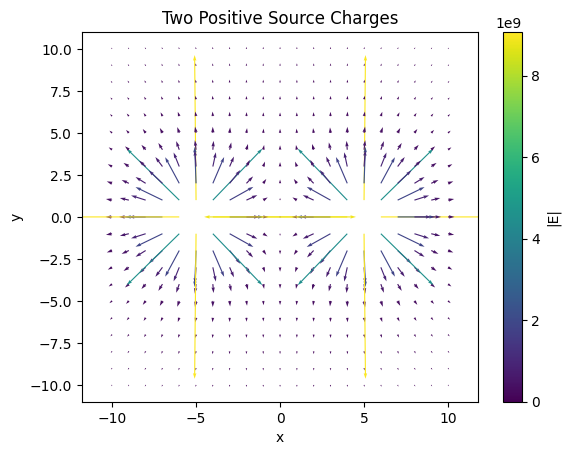

In [ ]:
N = 21 # number of grid points in x and y direction
x = np.linspace(-10,10,N) # x coordinates (m)
y = np.linspace(-10,10,N) # y coordinates (m)
X, Y = np.meshgrid(x,y) # make 2D grid of x coordinates and y coordinates

x0 = np.array([-5,5])
y0 = np.array([0,0])
Q = np.array([1,1])
Ex, Ey = calcEfield(x0,y0,Q,X,Y);
plotEfieldVecs(Ex,Ey,X,Y, "Two Positive Source Charges");

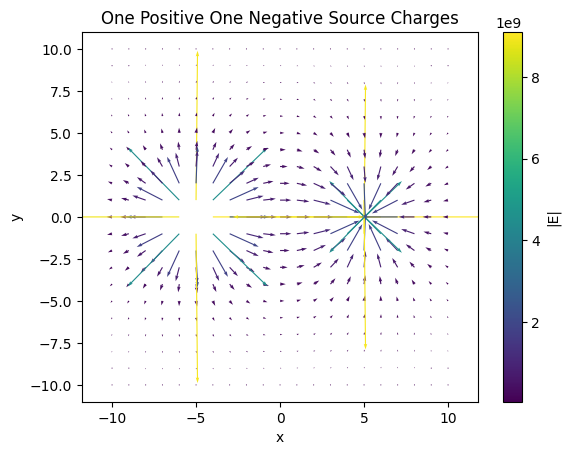

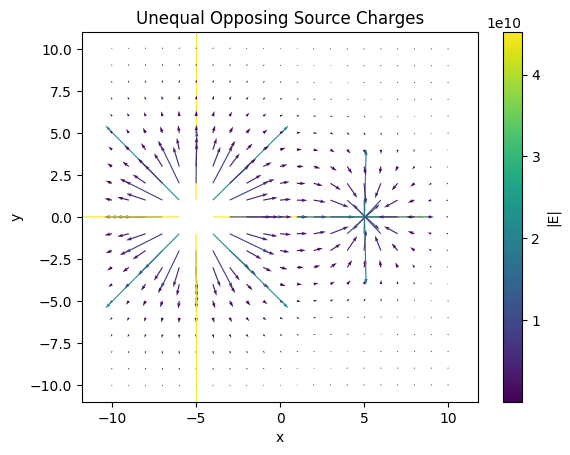

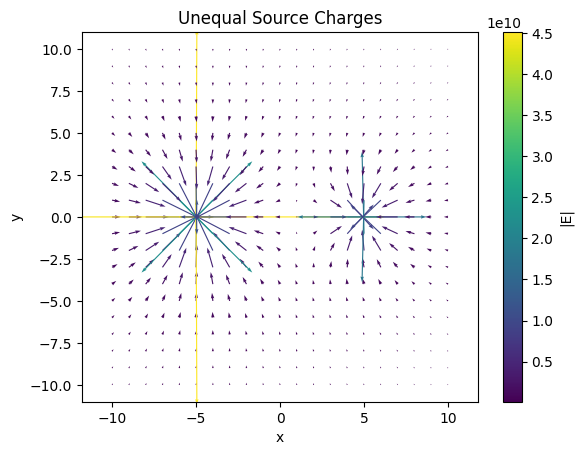

In [ ]:
N = 21 # number of grid points in x and y direction
x = np.linspace(-10,10,N) # x coordinates (m)
y = np.linspace(-10,10,N) # y coordinates (m)
X, Y = np.meshgrid(x,y) # make 2D grid of x coordinates and y coordinates

x0 = np.array([-5,5])
y0 = np.array([0,0])
Q = np.array([1,-1])
Ex, Ey = calcEfield(x0,y0,Q,X,Y);
plotEfieldVecs(Ex,Ey,X,Y, "One Positive One Negative Source Charges");

Q = np.array([5,-2])
Ex, Ey = calcEfield(x0,y0,Q,X,Y);
plotEfieldVecs(Ex,Ey,X,Y, "Unequal Opposing Source Charges");

Q = np.array([-5,-2])
Ex, Ey = calcEfield(x0,y0,Q,X,Y);
plotEfieldVecs(Ex,Ey,X,Y, "Unequal Source Charges");

<font color='red'> ***Q3***: What happens at `x=0` when you make one charge negative? What if the charges are unequal?  
</font>

See plot labeled "One Positive One Negative Source Charges". If you make one charge negative, there is now a force equidistant between the two point charges. Previously, if you didn't, the equally positive forces cancel out, however now they do not because they are both pulling in the rightward direction.

If the charges are unequal, the charge with the greater magnitude is where the net effect is seen. For instance, in my unequal plots the charge on the left has a larger magnitude of 5. Since it is negative in the first case, the behavior at 0,0 is directionally that of what it would have been without the second point charge--to the right. The same goes for the second plot; the prevailing behavior is inwards (negative charge, positive test charge).

For fun, let's use your function to plot the E-field distribution for 5 charges with random positions (within the bounds of our `X` and `Y` grid) and random charges from $(-1,1)$. Hint: Look up the `np.random.uniform` function

Point (3.1007645010630043,-2.7389740969673193) with Charge 0.10
Point (-4.076363725677661,1.6845521797247258) with Charge 0.19
Point (-9.502108815579852,-3.330771643190702) with Charge 0.33
Point (-1.852493694304652,-1.112632296782552) with Charge 0.39
Point (8.353634938686483,8.84981108460315) with Charge 0.08


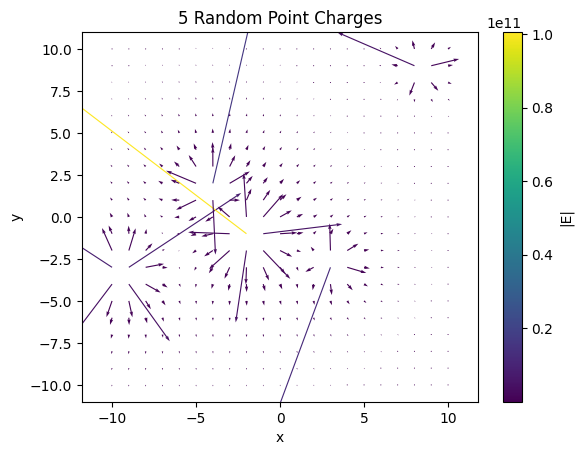

In [ ]:
#Ncharges = int(input("How many random charges: "))
#bounds = int(input("What NxN graph would you like: "))
Ncharges = 5
bounds = 10

my_title = f"{Ncharges} Random Point Charges"
x0 = np.random.uniform(-bounds,bounds, Ncharges)
y0 = np.random.uniform(-bounds,bounds, Ncharges)
Q = np.random.uniform(-1,1,5)

x = np.linspace(-bounds,bounds,bounds*2+1) # x coordinates (m)
y = np.linspace(-bounds,bounds,bounds*2+1) # y coordinates (m)
X, Y = np.meshgrid(x,y) # make 2D grid of x coordinates and y coordinates

#printing out the points that we have generated
for i, coord in enumerate(zip(x0,y0)):
  print(f"Point ({coord[0]},{coord[1]}) with Charge {Q[i]:.2f}")

#creating the electric field
Ex, Ey = calcEfield(x0,y0,Q,X,Y);
plotEfieldVecs(Ex,Ey,X,Y,my_title);

Visualizing the vector field is useful to understand the direction and magnitude of the field at each location, but in some cases, we'd just like to know the magnitude. We can visualize this using a 3D surface plot. To do this in an interactive plot, let's turn to a more advanced plotting package called [plotly](https://plotly.com/python/). Luckily, plotly is already installed in the default google colab python environment. We'll wrap this in a function so we can reuse it later. Also, for these plots, it'll help to have a more densely sampled grid.

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "colab"

N = 101 # number of grid points in x and y direction
x = np.linspace(-10,10,N) # x coordinates (m)
y = np.linspace(-10,10,N) # y coordinates (m)
X, Y = np.meshgrid(x,y) # make 2D grid of x coordinates and y coordinates

Ex, Ey = calcEfield(x0,y0,Q,X,Y); # recalculate on new grid
Emag = np.hypot(Ex,Ey)
Emag_norm = Emag/Emag.max() # normalize to get a sense of relative values

def plotMag3D(X,Y,mag):
  fig = go.Figure(go.Surface(x=X,y=Y,z=mag))
  fig.update_layout(scene_aspectmode='cube')
  fig.show()

plotMag3D(X,Y,Emag)

Another way to visualize this distribution is as a 2D heatmap, which we can do using another function in the `plotly` library (specifically in the `express` module)

In [ ]:
import plotly.express as px

def plotMag2D(x,y,mag): # use 1D arrays instead of 2D
  fig = px.imshow(mag,x=y,y=x,labels={'x':'x','y':'y'})
  return fig

plotMag2D(x,y,np.log10(Emag))

Since the E-field magnitude is so sharply peaked, it can be hard to see how it varies in space.

<font color='red'> ***Q4***: Can you think of a way to make variations in the distribution easier to visualize? (hint: transform the E-field magnitude values) </font>

We can scale it down by applying something similar to a gain function (but it would be inversely applied) where the values that are lower are relatively unchanged but the super large values in the peaks would be divided down by a larger amount. This way we would be able to flatten the peaks and see if there are spatial variations we might have missed. One example of this would be to take the logarithmic values of the electric field magnitude.

<font color='red'> ***Q5***: What would the current density distribution look like? Describe how you would you modify your `calcEfield` function to output current density instead. </font>

Current density can be calculated from multiplying the conductivity by the electric field. We would just need to include a calculation within the function (we would need other arguments passed in) for current density or pass the whole current density already calculated in as an argument.

# From E-field to voltage

As covered in class, the electric field can also be represented as a potential distribution, or **voltage**. One key difference to note is the electric field is a *vector* field, meaning it has both magnitude and direction at each point in space, while the voltage is a scalar, meaning it is represented by a single value (magnitude) at each point in space. The E-field flows from high to low potentials.

The voltage for a point charge in free space is given by, $V = \frac{kQ}{r}$. Write a function called `calcV` to calculate the voltage generated by a set of point charges and plot this distribution for the same point charges as above in a surface plot using our `plotMag2D` function (Tip: start from your `calcEfield` function)


In [ ]:
def calcV(x0,y0,X,Y,Q):
  k = 8.99e9 # Coulomb's constant
  # your code goes here
  V = np.zeros_like(X)
  for x,y,q in zip(x0,y0,Q):
      r = np.sqrt((X - x)**2 + (Y - y)**2)  # distance from point to charge

      # Handle division by zero when r is zero
      with np.errstate(divide='ignore', invalid='ignore'):
        V += np.where(r != 0, k * q / r, np.inf)
  return V

V = calcV(x0,y0,X,Y,Q)
Vnorm = V/(np.abs(V)).max() # normalize to max

# Plot here
plotMag2D(x,y,Vnorm)

To get a bit more intuition, let's visualize the decay of voltage and E-field magnitude with distance in one dimension

One way to do this is extract a 'slice' of voltage values at a single x or y value where we placed a point charge.

In [ ]:
q_index = np.argmax(Q) # choose which charge to extract slice at

# Find the row closest to the y coordinate of the charge
x_coord = x0[q_index]
row_index = np.argmin(np.abs(x-x_coord))
# Find the column closest to the x coordinate of the charge
y_coord = y0[q_index]
col_index = np.argmin(np.abs(y-y_coord))

Text(0, 0.5, 'V (norm.)')

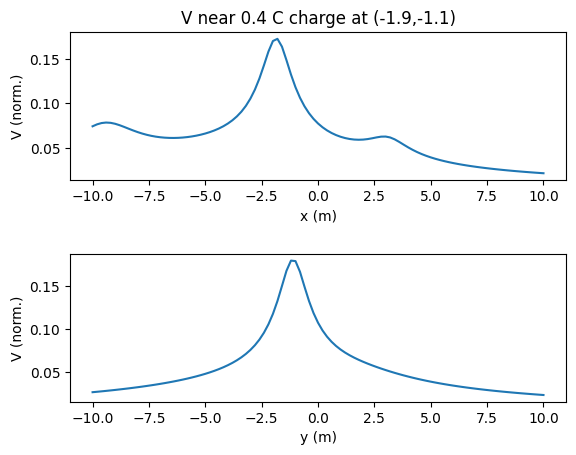

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(211)
# ax.plot(x,V[row_index,:]/np.max(np.abs(V[row_index,:])))
ax.plot(np.squeeze(x),np.squeeze(Vnorm[row_index,:]))
plt.xlabel('x (m)')
ax.set_xlabel('x (m)'); ax.set_ylabel('V (norm.)')
ax.set_title('V near {:.1f} C charge at ({:.1f},{:.1f})'.format(Q[q_index],x0[q_index],y0[q_index]))
fig.subplots_adjust(hspace=0.5) # make space between subplots so x label is visible

ax2 = fig.add_subplot(212)
# ax2.plot(y,V[:,row_index]/np.max(np.abs(V[:,row_index])))
ax2.plot(np.squeeze(y),np.squeeze(Vnorm[:,col_index]))
ax2.set_xlabel('y (m)'); ax2.set_ylabel('V (norm.)')

<font color='cyan'> Do these plots look as you'd expect given the location of the point charges?

--> yes, they do; there are local maxima right around where the point charges. There are other local smaller changes in the magnitude due to points that affect the slice extracted on the x or y axis.

# Currents in linear circuits

Now that we've visualized fields and potential distributions for abstract point charges in space, let's turn to the more idealized world of circuits.  Here, it's easier to deal with things in terms of voltages (potential differences) and currents. As you'll see soon, the approaches we use to analyze currents and voltages in discrete circuit elements will be directly applicable to modeling neurons.

We'll stick to linear circuits for now, which means the voltages and currents obey the superposition principle. This is the case when the values of the circuit elements, i.e., resistance and capacitance, in our case, do not vary with the level of voltage or current.

Starting with a voltage applied across two resistors (circuit shown below), write a function that calculates the current $I$ as a function of the voltage $V$ from the voltage source and the values of the two resistances $R_{1}$ and $R_{2}$. Using this function, what would the current be in milliAmperes (mA) if $V=1 \; V$, $R_{1} = 1 \; k\Omega$, and $R_{2} = 3 \; k\Omega$. Output your answer in a print statement.

<img src="https://raw.githubusercontent.com/CompModNervSystem/CompModNervSys-BioElectroStatics/main/resources/circuit_2R_series.png" alt_text="Series RC circuit" width=250>

In [ ]:
def calcIseriesR(R, V): # function arguments here
  # your code goes here
  tot_res = np.sum(R)
  I = V/tot_res
  return I #units will be dependent on R, V, but theoretically amps

R = [1e3,3e3] #ohms
V = 1 #volts
I = calcIseriesR(R, V) # function arguments here
print('I = {} mA'.format(I*1000)) # add output variable here, check units!

I = 0.25 mA


This circuit also has an interesting property if we were to instead analyze the voltage across the second resistor.

Using Ohm's law, we know $V = I(R_{1} + R_{2})$. The voltage across just the second resistor is just $V_{2} = IR_{2}$, since the current is the same everywhere in the circuit. After doing some algebra to solve for $V_{2}$, we get:

$V_{2} = V\frac{R_{2}}{R_{1} + R_{2}}$.

This is what's known as a *voltage divider* circuit (you can read more [here](https://en.wikipedia.org/wiki/Voltage_divider)). The voltage across the second resistor (or the first, we could have picked either one) is given by the ratio of its resistance to the sum of the two resistances, which we can call $n = R_{2}/R_{1}$.

To visualize this, make a plot of $V_{2}/V$ as a function of the ratio of the two resistances

(Hint: you can do a little more algebra to get a unitless form of this equation, i.e., $V_{2}/V = \text{something without }R$).

(Recommendation: use `np.logspace` and use log scale for your x and y axis)


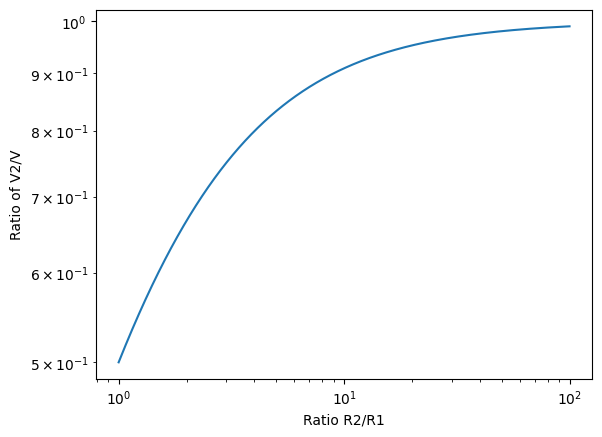

In [ ]:
#we want to plot V2/V as a function of the two resistances
n = np.logspace(0,2,10000)
V_ratio = n/(1+n)
plt.plot(n,V_ratio)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Ratio of V2/V")
plt.xlabel("Ratio R2/R1")
plt.show()

<font color='red'> ***Q6***: Is it possible to set the resistances such that $V_{2}$ is greater than $V$? What happens when $R_{2} >> R_{1}$ (significantly greater than) or $R_{2} << R_{1}$ (significantly less than) </font>

It is not possible to set the resistances such that the voltage of V2 is greater; the graph shows that there is an asymptote at V2/V = 1 approaching from the left, meaning that V2/V is always less than 1, meaning V is always greater than V2. Logically, this makes sense; since we can combine the resistances to make one resistance with one voltage drop, if somehow V2 was greater than V1 that would mean the voltage drop across V1 was negative (since current flows in one direction in this series circuit) which is not possible.

When R2 is significantly greater than R1, which would be the right side of the graph, the V2 is as close to V1 as it can get as implied by the ratio V2/V1 nearing 1.

When R2 is significantly smaller than R1, which would be the left side of the graph, V2 is significantly smaller than V1. This makes sense, because with low resistance that means the total voltage drop is mostly the result of R1 and thus V1 >> V2.

Next, let's look at a voltage applied across two resistors in parallel.

<img src="https://raw.githubusercontent.com/CompModNervSystem/CompModNervSys-BioElectroStatics/main/resources/circuit_2R_parallel.png" alt_text="Resistors in parallel" width=250>

Use Ohm's law (and Kirchoff's current law) to write a function that calculates the current $I$ as a function of the voltage $V$ from the voltage source and the values of the two resistances $R_{1}$ and $R_{2}$. Using this function, what would the current be in milliAmperes (mA) if $V=1 \; V$, $R_{1} = 4.5 \; k\Omega$, and $R_{2} = 0.5 \; k\Omega$. Output your answer in a print statement.

In [ ]:
#R is a list of resistors in parallel
#V is the voltage input

def calcIparallelR(R, V): # function arguments here
  R = np.array(R) #make sure that it is an array
  tot_res = 1/(np.sum(1/R))
  I = V/tot_res
  return I

# Use your function to calculate current for values given and print here
R = [4.5e3,0.5e3] #ohms
V = 1 #volts
I = calcIparallelR(R, V) # function arguments here
print('I = {:.2f} mA'.format(I*1000)) # add output variable here, check units!

I = 2.22 mA


Suppose that instead of just 2 resistors, we had $N$ resistors in parallel. Can you modify your function to calculate the current $I$ as a function of the voltage $V$ from the voltage source and an array of parallel resistances? Here's the formula for computing the equivalent resistance of resistors in parallel:

$ R_{equiv} = (1/R_{1} + 1/R_{2} + ... 1/R_{N})^{-1} = \sum_{i=1}^{N}(1/R_{i})^{-1}$

Use your function to calculate the total current $I$ for $V=1 \; V$ and the following set of parallel resistances:
[1,10,13,4.5,9] $k \Omega$

In [ ]:
# Your code goes here
# the function i created earlier does do it for a series resistors in parallel already I didn't realize it wasn't supposed to be generalizable
R = 1e3 * np.array([1,10,13,4.5,9])
V = 1 #volts
I = calcIparallelR(R, V) # function arguments here
print('I = {:.2f} mA'.format(I*1000)) # add output variable here, check units!
#as you can see, with more parallel resistors, the total resistance of the circuit goes down and the current goes up

I = 1.51 mA
